# EDA (Exploratory Data Analysis) del dataset de los viajes de los taxis verdes durante el mes de septiembre de 2024

## Paso 0: Importar librerias necesarias para el EDA y cargar el dataset que será analizado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Pandas para el manejo de la data.
* Matplotlib y seaborn para la visualizacion de los gráficos pertinentes.

In [2]:
raw_green_tripdata = pd.read_parquet('../assets/Datasets/green_tripdata_2024-09.parquet')
raw_green_tripdata.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-09-01 00:06:40,2024-09-01 00:31:15,N,1.0,92,37,1.0,10.66,43.6,1.0,0.5,0.00,0.0,NaN,1.0,46.10,2.0,1.0,0.0
1,2,2024-09-01 00:51:31,2024-09-01 01:14:11,N,1.0,80,80,1.0,3.89,22.6,1.0,0.5,5.02,0.0,NaN,1.0,30.12,1.0,1.0,0.0
2,2,2024-09-01 00:02:21,2024-09-01 00:06:37,N,1.0,42,116,1.0,0.80,6.5,1.0,0.5,0.00,0.0,NaN,1.0,9.00,1.0,1.0,0.0
3,2,2024-09-01 00:33:27,2024-09-01 00:42:08,N,1.0,41,42,1.0,1.84,11.4,1.0,0.5,0.00,0.0,NaN,1.0,13.90,2.0,1.0,0.0
4,2,2024-09-01 00:54:31,2024-09-01 00:55:52,N,5.0,42,42,1.0,0.00,29.0,0.0,0.0,0.00,0.0,NaN,1.0,30.00,1.0,2.0,0.0


El presente análisis se realizará sobre una pequeña muestra de los viajes (sept-2024) para observar la calidad de los datos recabados.

# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [3]:
raw_green_tripdata.shape

(54440, 20)

El dataset contiene 54.440 filas, que representan los viajes realizados durante el mes de septiembre de 2024, y 20 columnas

In [4]:
raw_green_tripdata.columns.tolist()

['VendorID',
 'lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'ehail_fee',
 'improvement_surcharge',
 'total_amount',
 'payment_type',
 'trip_type',
 'congestion_surcharge']

En líneas generales, la informacion en las columnas de este dataset contienen lo siguiente:

* Proveedor tecnológico que generó el viaje y suministró la data (VendorID).
* Hora y fecha donde comenzó y terminó el viaje (lpep_pickup_datetime y lpep_dropoff_datetime).
* Numero de pasajeros reportado por el conductor (passenger_count).
* Distance recorrida durante el viaje (trip_distance).
* Tipo de tarifa aplicada al terminar el viaje (RatecodeID).
* Si la informacion del viaje fue suministrada al momento, o si fue almacenada en memoria del vehiculo por no tener conexion con el servidor (store_and_fwd_flag).
* Zona TLC donde comenzó y terminó el viaje (PULocationID y DOLocationID).
* Forma de pago del pasajero (payment_type)
* Tipo de viaje (mediante aplicación o solicitud en la calle)
* Tarifa base del viaje (fare_amount)
* Cargos extra asociados al viaje (extra, mta_tax, tolls_amount, improvement_surcharge, congestion_surcharge y ehail_fee)
* Propina (tip_amount)
* Tarifa total pagada por el pasajero (total_amount)

En resumen, se tiene informacion detallada sobre todos los viajes realizados durante el mes de septiembre de 2024 que incluyen principalmente tiempo, distancia, ubicaciones y costo del viaje.

In [5]:
raw_green_tripdata.sort_values(by=['lpep_pickup_datetime'])

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
47009,2,2008-12-31 00:00:00,2008-12-31 00:00:00,N,1.0,55,55,1.0,6.29,59.7,0.0,0.5,0.00,0.0,NaN,1.0,61.20,2.0,1.0,0.0
29647,2,2024-08-18 09:59:28,2024-08-18 09:59:32,N,1.0,193,193,5.0,0.00,-3.0,0.0,-0.5,0.00,0.0,NaN,-1.0,-4.50,3.0,1.0,0.0
29648,2,2024-08-18 09:59:28,2024-08-18 09:59:32,N,1.0,193,193,5.0,0.00,3.0,0.0,0.5,0.00,0.0,NaN,1.0,4.50,3.0,1.0,0.0
191,2,2024-08-25 22:23:27,2024-08-25 22:40:35,N,1.0,92,16,1.0,2.88,18.4,0.0,0.5,0.00,0.0,NaN,1.0,19.90,2.0,1.0,0.0
1579,2,2024-08-26 20:24:16,2024-08-26 20:37:12,N,1.0,93,95,1.0,3.11,16.3,1.0,0.5,3.76,0.0,NaN,1.0,22.56,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52732,2,2024-09-30 23:55:55,2024-10-01 00:04:38,N,1.0,129,129,1.0,1.06,9.3,1.0,0.5,0.00,0.0,NaN,1.0,11.80,2.0,1.0,0.0
52704,2,2024-09-30 23:56:37,2024-10-01 00:10:46,N,1.0,130,205,1.0,2.74,17.0,1.0,0.5,3.90,0.0,NaN,1.0,23.40,1.0,1.0,0.0
52716,2,2024-10-01 00:00:33,2024-10-01 00:06:35,N,1.0,244,116,1.0,1.36,9.3,1.0,0.5,2.36,0.0,NaN,1.0,14.16,1.0,1.0,0.0
52608,2,2024-10-01 21:42:01,2024-10-01 21:54:26,N,1.0,95,102,1.0,1.78,13.5,1.0,0.5,3.20,0.0,NaN,1.0,19.20,1.0,1.0,0.0


Se observa que el dataset tiene algunos valores inesperados, entre ellos unos correspondientes a años que no son 2024, y otros que corresponden a un mes que no es septiembre. A continuación se observará en mayor detalle estos valores.

In [6]:
raw_green_tripdata[raw_green_tripdata['lpep_pickup_datetime'].dt.year!=2024]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
47009,2,2008-12-31,2008-12-31,N,1.0,55,55,1.0,6.29,59.7,0.0,0.5,0.0,0.0,NaN,1.0,61.2,2.0,1.0,0.0


Se tiene que hay 1 valor que no son del año 2024, por lo que podemos considerarlo erroóneo ya que no deberian estar en este dataset. Se procederá a eliminarlo.

In [7]:
raw_green_tripdata = raw_green_tripdata[raw_green_tripdata['lpep_pickup_datetime'].dt.year==2024]
raw_green_tripdata.shape

(54439, 20)

El numero de filas indica que el dato erróneo han sido eliminado correctamente.

In [8]:
raw_green_tripdata[raw_green_tripdata['lpep_pickup_datetime'].dt.month!=9]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
10,2,2024-08-31 22:32:50,2024-08-31 22:36:24,N,1.0,74,42,1.0,0.75,5.8,1.0,0.5,2.08,0.00,NaN,1.0,10.38,1.0,1.0,0.00
22,2,2024-08-31 23:56:33,2024-09-01 00:01:32,N,1.0,41,24,6.0,0.85,7.2,1.0,0.5,0.00,0.00,NaN,1.0,9.70,2.0,1.0,0.00
191,2,2024-08-25 22:23:27,2024-08-25 22:40:35,N,1.0,92,16,1.0,2.88,18.4,0.0,0.5,0.00,0.00,NaN,1.0,19.90,2.0,1.0,0.00
1579,2,2024-08-26 20:24:16,2024-08-26 20:37:12,N,1.0,93,95,1.0,3.11,16.3,1.0,0.5,3.76,0.00,NaN,1.0,22.56,1.0,1.0,0.00
1589,2,2024-08-26 21:00:12,2024-08-26 21:10:36,N,1.0,93,92,1.0,2.01,12.1,0.0,0.5,0.00,0.00,NaN,1.0,13.60,1.0,1.0,0.00
1590,2,2024-08-26 21:32:44,2024-08-26 21:58:49,N,1.0,93,162,1.0,10.62,45.0,0.0,0.5,9.85,0.00,NaN,1.0,59.10,1.0,1.0,2.75
1601,2,2024-08-26 22:29:12,2024-08-26 22:44:29,N,1.0,93,80,1.0,8.74,34.5,0.0,0.5,7.20,0.00,NaN,1.0,43.20,1.0,1.0,0.00
1623,2,2024-08-26 23:08:52,2024-08-26 23:38:29,N,1.0,93,234,1.0,10.82,46.4,0.0,0.5,11.52,6.94,NaN,1.0,69.11,1.0,1.0,2.75
1649,2,2024-08-27 00:20:23,2024-08-27 00:44:01,N,1.0,93,232,1.0,12.27,49.2,0.0,0.5,16.04,0.00,NaN,1.0,69.49,1.0,1.0,2.75
1735,2,2024-08-27 02:00:55,2024-08-27 02:05:05,N,1.0,92,92,1.0,0.00,5.8,0.0,0.5,0.00,0.00,NaN,1.0,7.30,2.0,1.0,0.00


En este caso los valores que no son del mes de septiembre la mayoría son de dias lejanos al comienzo o fin de septiembre. solo unos pocos son de viajes minutos antes o despues (ultimos viajes de agosto y primeros viajes de octubre). Por simplicidad y para mantener la consistencia de los datos, se eliminaran todos aquellos viajes cuyo pick-up date no sea en septiembre

Como nota hay que destacar que al momento de utilizar y combinar datasets de diferentes meses **hay que corroborar que datos como estos no terminen duplicados o erróneamente eliminados**.

In [9]:
raw_green_tripdata = raw_green_tripdata[raw_green_tripdata['lpep_pickup_datetime'].dt.month==9]
raw_green_tripdata.shape

(54406, 20)

In [10]:
raw_green_tripdata.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        1704
RatecodeID                1704
PULocationID                 0
DOLocationID                 0
passenger_count           1704
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                54406
improvement_surcharge        0
total_amount                 0
payment_type              1704
trip_type                 1707
congestion_surcharge      1704
dtype: int64

Aca se observa el numero de valores nulos encontrados por cada columna. Tenemos que:

* Toda la columna de `ehail_fee` tiene valores nulos.
* Solo hay valores nulos en las columnas correspondientes a número de pasajeros, tipo de tarifa, envio o almacenamiento de la información del viaje, cargo por trafico, tipo de pago y tipo de viaje.
* Para el resto de columnas no hay valores nulos.
* A excepción de `ehail_fee`, el numero de valores nulos en las columnas mencionadas es 1704, excepto el tipo de viaje donde hay 3 viajes extra que son nulos. Se revisará si corresponden a las mismas filas.

In [11]:
null_calculation=raw_green_tripdata.drop(['ehail_fee','trip_type'],axis=1)
null_calculation.shape

(54406, 18)

In [12]:
null_calculation.shape[0] - null_calculation.dropna().shape[0]

1704

Con el calculo anterior se corrobora que los 1704 nulos se encuentran en las mismas filas.

A continuación se estudiara un poco mas en detalle esos valores nulos, en especial esos 3 extra en `trip_type`.

In [13]:
raw_green_tripdata[(raw_green_tripdata['passenger_count'].notna())&(raw_green_tripdata['trip_type'].isnull())]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
28619,1,2024-09-17 16:40:59,2024-09-17 16:40:59,Y,99.0,75,264,0.0,0.0,13.69,0.0,0.0,0.0,0.0,NaN,0.0,13.69,1.0,NaN,0.0
43397,1,2024-09-25 17:00:00,2024-09-25 17:20:31,N,99.0,37,62,1.0,2.3,20.50,0.0,1.5,0.0,0.0,NaN,1.0,22.00,1.0,NaN,0.0
45095,1,2024-09-26 15:23:49,2024-09-26 16:41:21,N,99.0,68,89,1.0,7.5,48.50,0.0,1.5,0.0,0.0,NaN,1.0,50.00,1.0,NaN,0.0


In [14]:
raw_green_tripdata['RatecodeID'].value_counts()

RatecodeID
1.0     49024
5.0      3356
2.0       177
4.0        98
3.0        44
99.0        3
Name: count, dtype: int64

Al evaluar los 3 viajes con `trip_type` nulos, resalta que el tipo de pago es '99', el cual no es un tipo de tarifa enlistado en el diccionario de datos, el cual contiene etiquetas que van del 1 al 6.

También se observa que son los unicos viajes con ese tipo de tarifa.

In [15]:
raw_green_tripdata.duplicated().sum()

0

No hay valores duplicados en el dataset

Ahora se procederá a evaluar algunos valores por columna.

Para ciertas columnas, un valor cero o negativo no tiene sentido, a continuación se evaluaran algunos de ellos:

In [16]:
print(f'Viajes con 0 pasajeros: {raw_green_tripdata[raw_green_tripdata['passenger_count'] == 0].shape[0]}')
print(f'Viajes con numero "negativo" pasajeros: {raw_green_tripdata[raw_green_tripdata['passenger_count'] < 0].shape[0]}')

Viajes con 0 pasajeros: 584
Viajes con numero "negativo" pasajeros: 0


No hay valores con numero de pasajeros negativo, pero hay 584 viajes donde se reporta que hay 0 pasajeros viajando.

Hay que tomar en cuenta que segun el diccionario de la fuente de los datos, estos valores son suministrados por los conductores.

In [17]:
print(f'Viajes con distancia 0: {raw_green_tripdata[raw_green_tripdata['trip_distance'] == 0].shape[0]}')
print(f'Viajes con distancia "negativa": {raw_green_tripdata[raw_green_tripdata['trip_distance'] < 0].shape[0]}')

Viajes con distancia 0: 2772
Viajes con distancia "negativa": 0


No hay distancias recorridas negativas pero si hay distancias "cero" (2772 viajes).
Estos valores (fecha, hora y ubicacion) se inician y terminan cuando el taximetro es activado por el conductor, lo que puede indicar error por parte del taxista a la hora de activar el dispositivo.

In [18]:
print(raw_green_tripdata[raw_green_tripdata['PULocationID'] <= 0].shape)
print(raw_green_tripdata[raw_green_tripdata['DOLocationID'] <= 0].shape)

(0, 20)
(0, 20)


No hay valores cero o negativos de ubicacion inicial y final.

In [19]:
print(f'Viajes con tarifa 0: {raw_green_tripdata[raw_green_tripdata['fare_amount'] == 0].shape[0]}')
print(f'Viajes con tarifa "negativa": {raw_green_tripdata[raw_green_tripdata['fare_amount'] < 0].shape[0]}')

Viajes con tarifa 0: 89
Viajes con tarifa "negativa": 156


Los viajes con tarifas negativas pudieran significar que son retornos, pero no se tiene información extra al respecto para confirmar.

De igual forma, los viajes con tarifas 0 pudieran representar viajes cancelados.

In [20]:
print(f'Viajes con pago total 0: {raw_green_tripdata[raw_green_tripdata['total_amount'] == 0].shape[0]}')
print(f'Viajes con pago total "negativo": {raw_green_tripdata[raw_green_tripdata['total_amount'] < 0].shape[0]}')

Viajes con pago total 0: 61
Viajes con pago total "negativo": 161


Al igual que con las tarifas, no se tiene información explícita sobre que pudieran representar estos valores.

Otra cosa a resaltar es que la cantidad de viajes con valores cero es menor que con el caso de las tarifas, pero para el caso de valores negativos encontramos mas cantidad respecto a la cantidad de negativos en las tarifas base.

# Paso 2: Análisis preparatorio para el proceso ETL

A continuación pasaremos a mostrar el tipo de datos de este dataset, separar las columnas por la importancia para los objetivos del proyecto y sugerencias para cambios

In [21]:
raw_green_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54406 entries, 0 to 54439
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               54406 non-null  int32         
 1   lpep_pickup_datetime   54406 non-null  datetime64[us]
 2   lpep_dropoff_datetime  54406 non-null  datetime64[us]
 3   store_and_fwd_flag     52702 non-null  object        
 4   RatecodeID             52702 non-null  float64       
 5   PULocationID           54406 non-null  int32         
 6   DOLocationID           54406 non-null  int32         
 7   passenger_count        52702 non-null  float64       
 8   trip_distance          54406 non-null  float64       
 9   fare_amount            54406 non-null  float64       
 10  extra                  54406 non-null  float64       
 11  mta_tax                54406 non-null  float64       
 12  tip_amount             54406 non-null  float64       
 13  tolls_

**Aquí se puede observar que el tipo de dato es acorde a la informacion que posee.**

### De la información anterior, las principales columnas necesarias de acuerdo a los objetivos y producto ML son:

| Columna           |  Tipo de dato  
| ------             | -----  
| lpep_pickup_datetime  | datetime64[us] 
| lpep_dropoff_datetime  |datetime64[us]
| trip_distance    | float64       
| PULocationID      |  int32 
| DOLocationID| int32 



### Columnas opcionales que se pueden conservar para algun tipo de extra o plus.

| Columna          |     tipo de dato      
| ------             |    -----  
| fare_amount       | float64 
| total_amount       | float64
| extra  | float64       
| mta_tax  | float64       
| tip_amount    | float64       
| tolls_amount   | float64       
| improvement_surcharge  | float64              
| congestion_surcharge| float64       
| ehail_fee           |float64        

### Columnas que, por el momento, no aportan información relevante relacionada con el proyecto


| Columna          |     Tipo de dato      
| ------             |    -----  
| VendorID     |            int32      
|  passenger_count   |       float64       
|  RatecodeID     |          float64       
| store_and_fwd_flag  |     object          
| payment_type    |         int64  
| trip_type     |           float64 

In [22]:
green_filtrado = raw_green_tripdata[['lpep_pickup_datetime', 
                                     'lpep_dropoff_datetime',
                                     'trip_distance',
                                     'PULocationID',
                                     'DOLocationID']]

green_filtrado.shape

(54406, 5)

## Para el filtrado de datos, se sugiere seguir los siguientes criterios:

* Eliminar las filas donde `pick_up_datetime` y `pick_up_location` sean nulos.

In [23]:
green_filtrado = green_filtrado[(green_filtrado['lpep_pickup_datetime'].notnull())&(green_filtrado['PULocationID'].notnull())].copy().reset_index(drop=True)

green_filtrado.shape

(54406, 5)

* Calcular tiempo de viaje (`drop_off_datetime` - `pick_up_datetime`).
* Eliminar tiempos y distancias 0 y negativas.

In [24]:
green_filtrado['trip_time'] = green_filtrado['lpep_dropoff_datetime']-green_filtrado['lpep_pickup_datetime']
green_filtrado = green_filtrado[(green_filtrado['trip_time']>pd.Timedelta(0))&(green_filtrado['trip_distance']>0)].reset_index(drop=True)

green_filtrado.shape

(51625, 6)

* Con tiempos y distancias positivas crear una nueva columna calculando velocidad promedio.
* Mantener filas cuyas velocidades sean razonables (Valor a establecer, en este EDA se usara 65 mph que es la maxima velocidad permitida en NYC).

In [25]:
green_filtrado['avg_speed'] = green_filtrado['trip_distance']/(green_filtrado['trip_time']/pd.Timedelta(hours=1))
green_filtrado['avg_speed'].dtype

dtype('float64')

In [26]:
green_filtrado = green_filtrado[(green_filtrado['avg_speed']>=0)&(green_filtrado['avg_speed']<=65)].reset_index(drop=True)

green_filtrado.shape

(51406, 7)

# Paso 3: Gráficos, Distribuciones y Correlaciones

A continuación pasaremos a mostrar graficamente algunas distribuciones y correlaciones presentes en los datos

Para el producto ML que se presentará, los valores mas relevantes son la fecha, hora, y ubicacion, por lo que mostraremos los graficos de distribución considerando esos valores

In [27]:
green_filtrado['weekday']= green_filtrado['lpep_pickup_datetime'].dt.day_name()
green_filtrado.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday
0,2024-09-01 00:06:40,2024-09-01 00:31:15,10.66,92,37,0 days 00:24:35,26.017627,Sunday
1,2024-09-01 00:51:31,2024-09-01 01:14:11,3.89,80,80,0 days 00:22:40,10.297059,Sunday
2,2024-09-01 00:02:21,2024-09-01 00:06:37,0.80,42,116,0 days 00:04:16,11.250000,Sunday
3,2024-09-01 00:33:27,2024-09-01 00:42:08,1.84,41,42,0 days 00:08:41,12.714012,Sunday
4,2024-09-01 00:24:09,2024-09-01 00:29:35,2.19,223,83,0 days 00:05:26,24.184049,Sunday


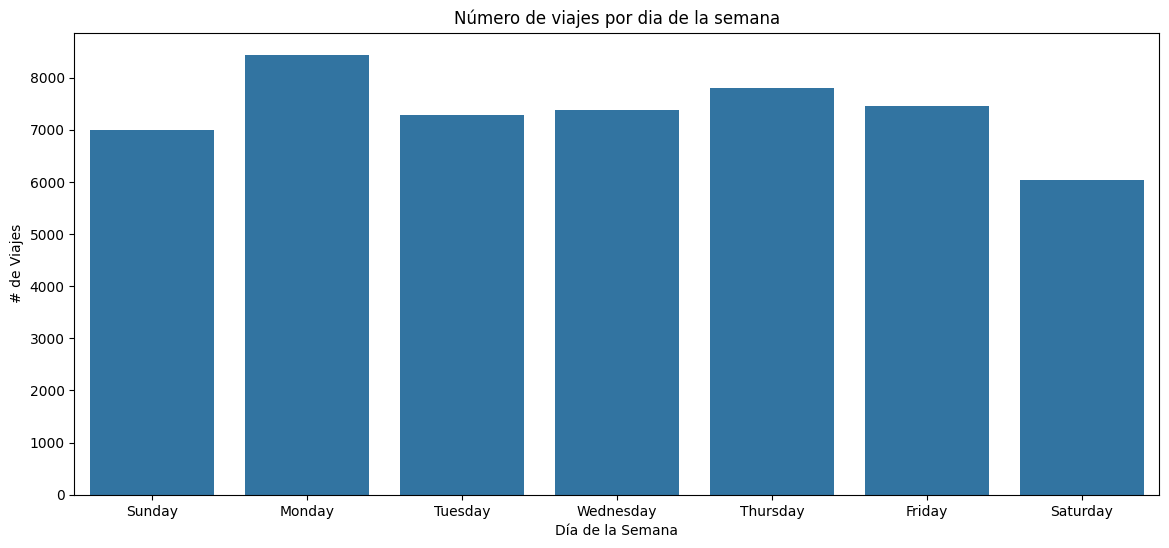

In [28]:
plt.rcParams["figure.figsize"] = (14,6)
sns.countplot(data=green_filtrado,x='weekday',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Número de viajes por dia de la semana') 
plt.xlabel('Día de la Semana')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que, en general, la cantidad de viajes durante la semana es homogénea, con un minimo los dias sábado y máximo los días lunes.

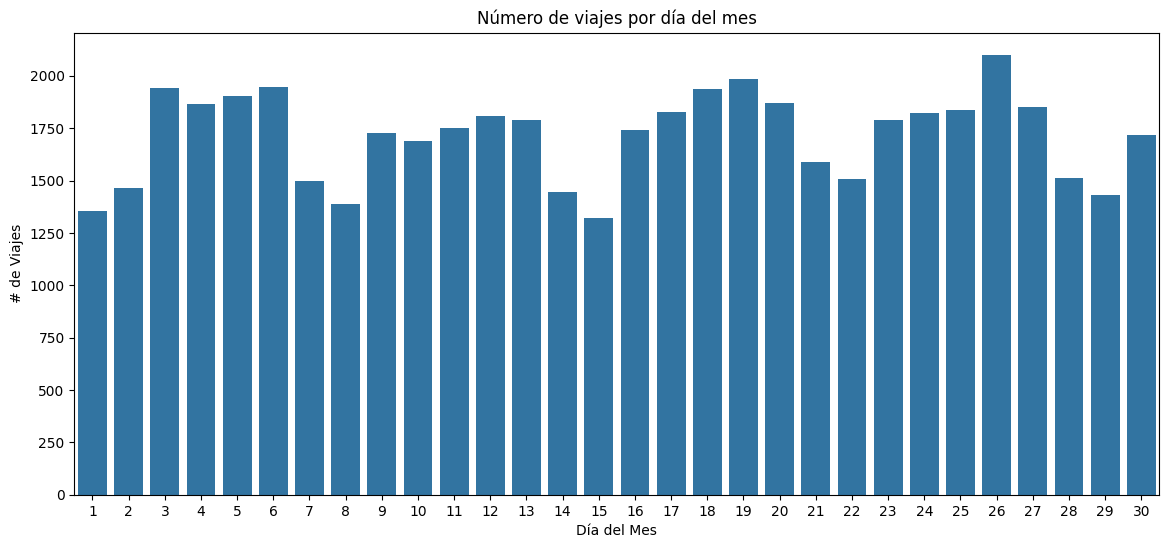

In [29]:
sns.countplot(data=green_filtrado,x=green_filtrado['lpep_pickup_datetime'].dt.day)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

### Se observa una tendencia oscilante que va acorde con el comportamiento de la cantidad de viajes observado durante los dias de la semana

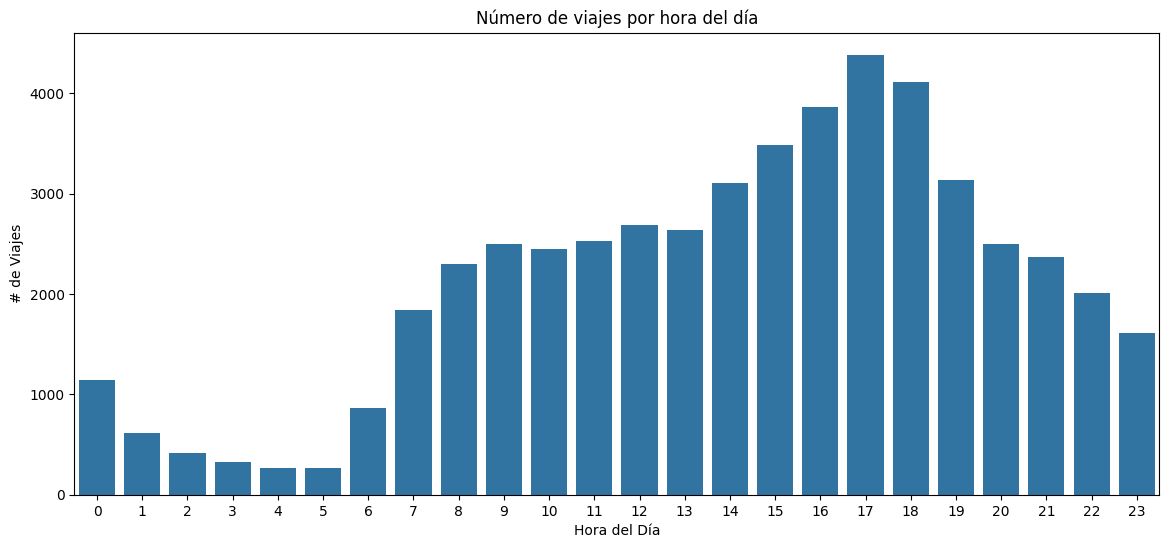

In [30]:
sns.countplot(data=green_filtrado,x=green_filtrado['lpep_pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### Al examinar el numero de viajes durante el día, comenzamos en un minimo de viajes a partir de las 4-5am que comienza a crecer notoriamente a partir de las 6am, hasta llegar a un pico a las 5pm, donde luego comienza a descender nuevamente.

In [31]:
green_time_transformed = green_filtrado.copy()

green_time_transformed['PU_dia']=green_time_transformed['lpep_pickup_datetime'].dt.day
green_time_transformed['PU_mes']=green_time_transformed['lpep_pickup_datetime'].dt.month
green_time_transformed['PU_hora']=green_time_transformed['lpep_pickup_datetime'].dt.hour
green_time_transformed['PU_dia_semana']=green_time_transformed['lpep_pickup_datetime'].dt.weekday
green_time_transformed['PU_año']=green_time_transformed['lpep_pickup_datetime'].dt.year

green_time_transformed.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:06:40,2024-09-01 00:31:15,10.66,92,37,0 days 00:24:35,26.017627,Sunday,1,9,0,6,2024
1,2024-09-01 00:51:31,2024-09-01 01:14:11,3.89,80,80,0 days 00:22:40,10.297059,Sunday,1,9,0,6,2024
2,2024-09-01 00:02:21,2024-09-01 00:06:37,0.80,42,116,0 days 00:04:16,11.250000,Sunday,1,9,0,6,2024


In [32]:
trip_counts= green_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

trip_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,56
1,2024,9,1,1,6,Sunday,33
2,2024,9,1,2,6,Sunday,14
3,2024,9,1,3,6,Sunday,20
4,2024,9,1,4,6,Sunday,21
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,106
716,2024,9,30,20,0,Monday,64
717,2024,9,30,21,0,Monday,70
718,2024,9,30,22,0,Monday,56


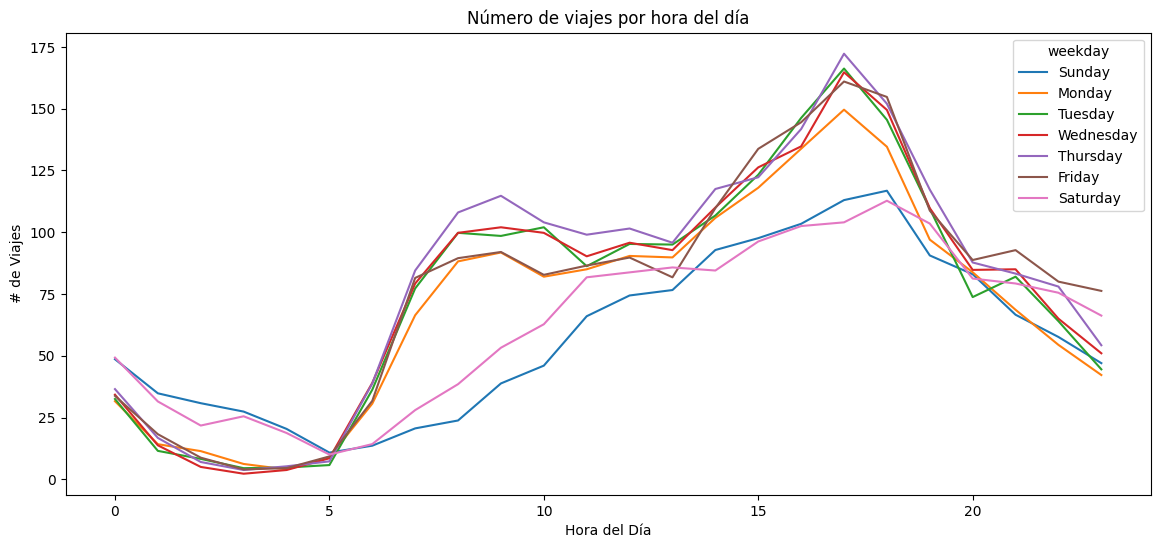

In [33]:
sns.lineplot(data=trip_counts,x=trip_counts['PU_hora'],y=trip_counts['Count'],hue=trip_counts['weekday'],errorbar=None)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### **Al examinar el numero de viajes durante el día, pero separando segun el dia de la semana, podemos observar que hay una diferencia clara, en especial en las primeras horas del dia, entre los dia de semana (Lun-Vie) y los fines de semana (Sab-Dom).**

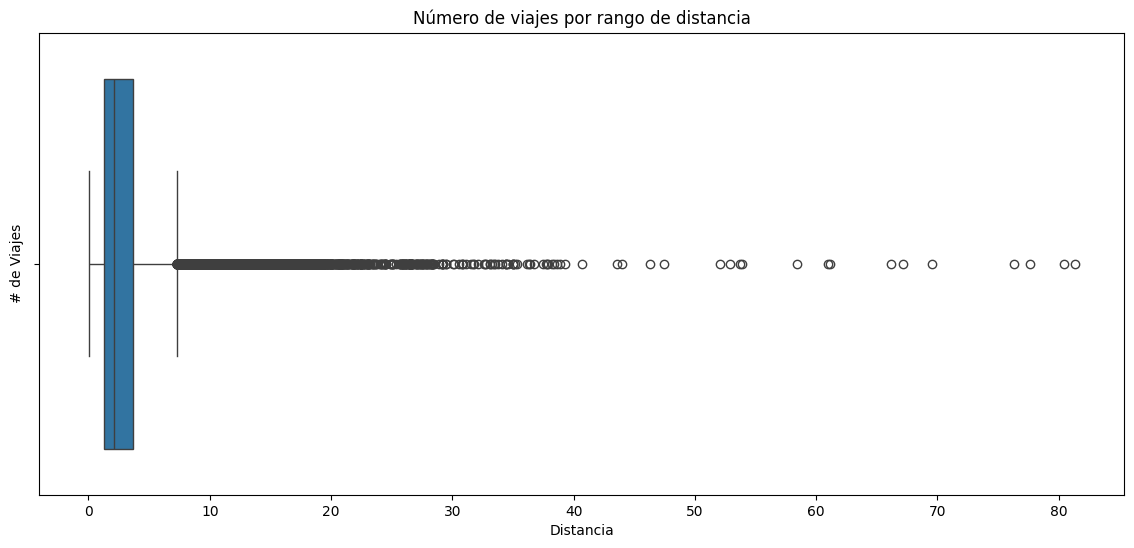

In [34]:
sns.boxplot(x=green_filtrado['trip_distance'])
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Para las distancias recorridas, claramente se ve que hay valores que distorsionan fuertemente el diagrama
### Se realizara un filtro donde se conservara solamente aquellos valores razonables

In [35]:
green_filtrado['trip_distance'].describe()

count    51406.000000
mean         3.254794
std          3.626171
min          0.010000
25%          1.300000
50%          2.090000
75%          3.700000
max         81.340000
Name: trip_distance, dtype: float64

### Debido a la influencia de los outliers, nos quedaremos con el percentil 90

In [36]:
quantile_90 = green_filtrado[green_filtrado['trip_distance'] <= green_filtrado['trip_distance'].quantile(0.90)]['trip_distance'].reset_index(drop=True)
quantile_90.describe()

count    46266.000000
mean         2.306969
std          1.524597
min          0.010000
25%          1.220000
50%          1.890000
75%          3.010000
max          7.210000
Name: trip_distance, dtype: float64

### Ahora nuestro maximo pasó de 81.34 millas a 7.21. Graficaremos para observar la distribucion de caja.

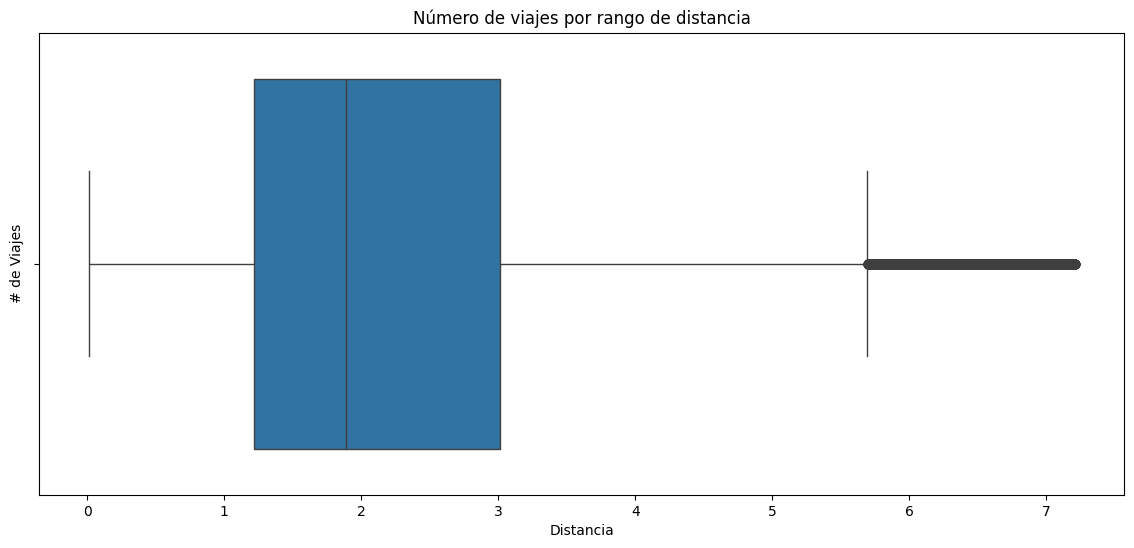

In [37]:
sns.boxplot(x=quantile_90)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Aquí se observa una distribución mas razonable. Con este nuevo rango se pueden visualizar los histogramas:

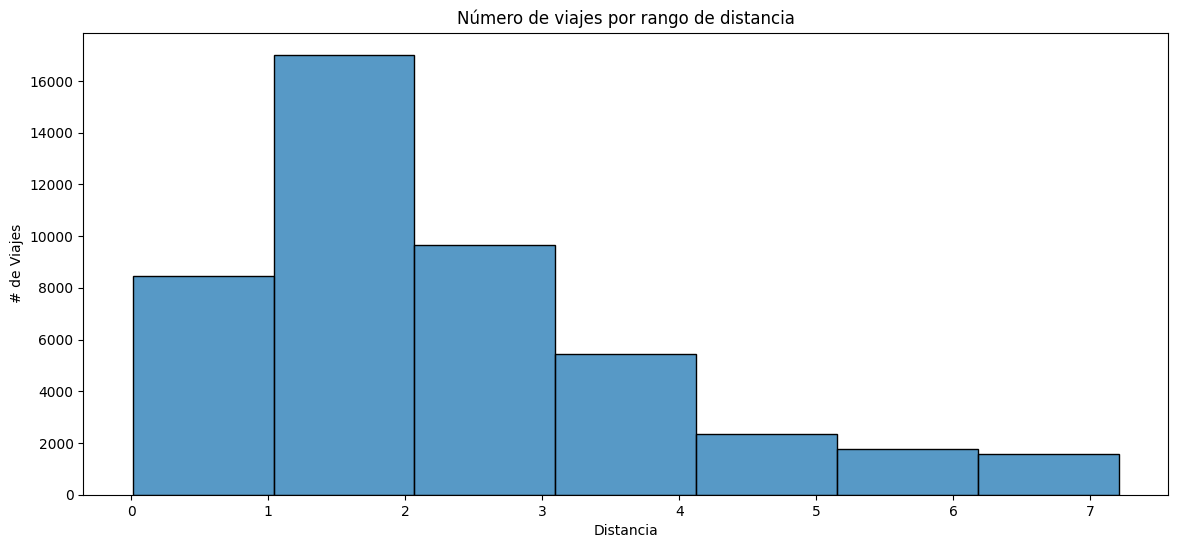

In [38]:
sns.histplot(data=quantile_90, binwidth=1)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que la gran mayoria de los viajes recorren una distancia de hasta 4 millas.

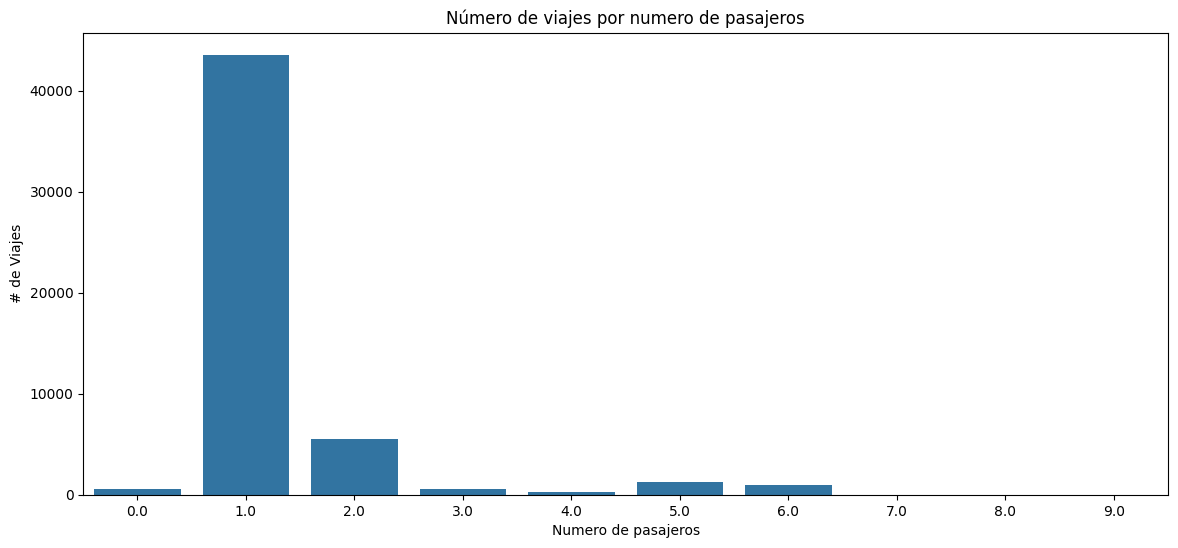

In [39]:
sns.countplot(data=raw_green_tripdata,x='passenger_count')
plt.title('Número de viajes por numero de pasajeros') 
plt.xlabel('Numero de pasajeros')
plt.ylabel('# de Viajes')
plt.show()

### Acá se observa que la gran mayoría de los viajes son de 1 solo pasajero. Se observa también viajes de "cero" pasajeros. La fuente de datos indica que este valor es introducido por el conductor, puede significar un error o representar un "envío de paquete" en el caso de que la compañía ofrezca ese servicio.

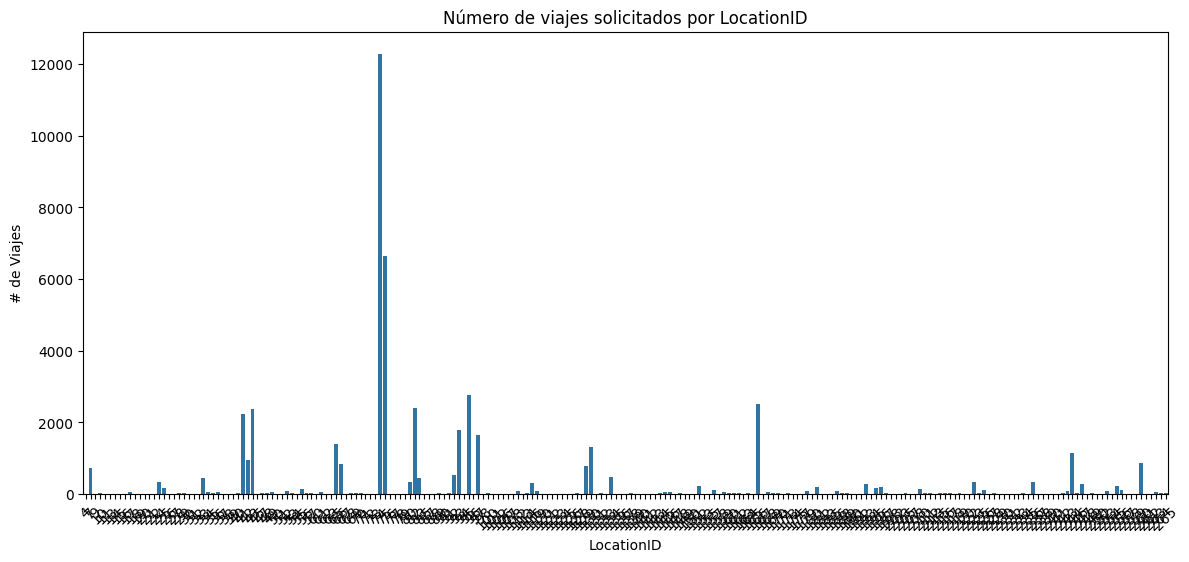

In [40]:
sns.countplot(data=green_filtrado,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

### Acá se puede observar la cantidad de viajes solicitados por zona de NY. Al tener tantas zonas el grafico esta muy saturado, pero se puede observar claramente ciertas zonas donde claramente hay mayor demanda. A continuación se filtrará la data para obtener solo aquellos con un numero alto de solicitudes.

El siguiente filtro es para quedarnos con las filas que tengan los LocationID donde la suma de los viajes solicitados en dichos LocationID es mayor a 500.

In [41]:
conteo_500 = green_filtrado.groupby('PULocationID').filter(lambda x: len(x) >= 500).copy()
# green_filtrado[green_filtrado['PULocationID'].isin(green_filtrado['PULocationID'].value_counts()[green_filtrado['PULocationID'].value_counts()>500].index)]
# Forma secundaria

conteo_500

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday
0,2024-09-01 00:06:40,2024-09-01 00:31:15,10.66,92,37,0 days 00:24:35,26.017627,Sunday
2,2024-09-01 00:02:21,2024-09-01 00:06:37,0.80,42,116,0 days 00:04:16,11.250000,Sunday
3,2024-09-01 00:33:27,2024-09-01 00:42:08,1.84,41,42,0 days 00:08:41,12.714012,Sunday
5,2024-09-01 00:29:04,2024-09-01 00:46:01,7.27,93,10,0 days 00:16:57,25.734513,Sunday
6,2024-09-01 00:27:24,2024-09-01 00:44:41,3.15,66,148,0 days 00:17:17,10.935391,Sunday
...,...,...,...,...,...,...,...,...
51392,2024-09-30 17:26:18,2024-09-30 17:30:59,0.93,7,193,0 days 00:04:41,11.914591,Monday
51394,2024-09-30 17:36:00,2024-09-30 17:47:00,2.19,41,43,0 days 00:11:00,11.945455,Monday
51402,2024-09-30 21:20:00,2024-09-30 21:35:00,4.87,74,169,0 days 00:15:00,19.480000,Monday
51404,2024-09-30 23:33:35,2024-10-01 00:56:53,16.38,41,216,0 days 01:23:18,11.798319,Monday


In [42]:
green_filtrado['PULocationID'].nunique()

221

In [43]:
green_filtrado['PULocationID'].value_counts()[green_filtrado['PULocationID'].value_counts()>=500].shape

(18,)

### De lo anterior se observa que de los 221 diferentes LocationID, en 18 de ellos es donde se concentra la mayoría de las solicitudes

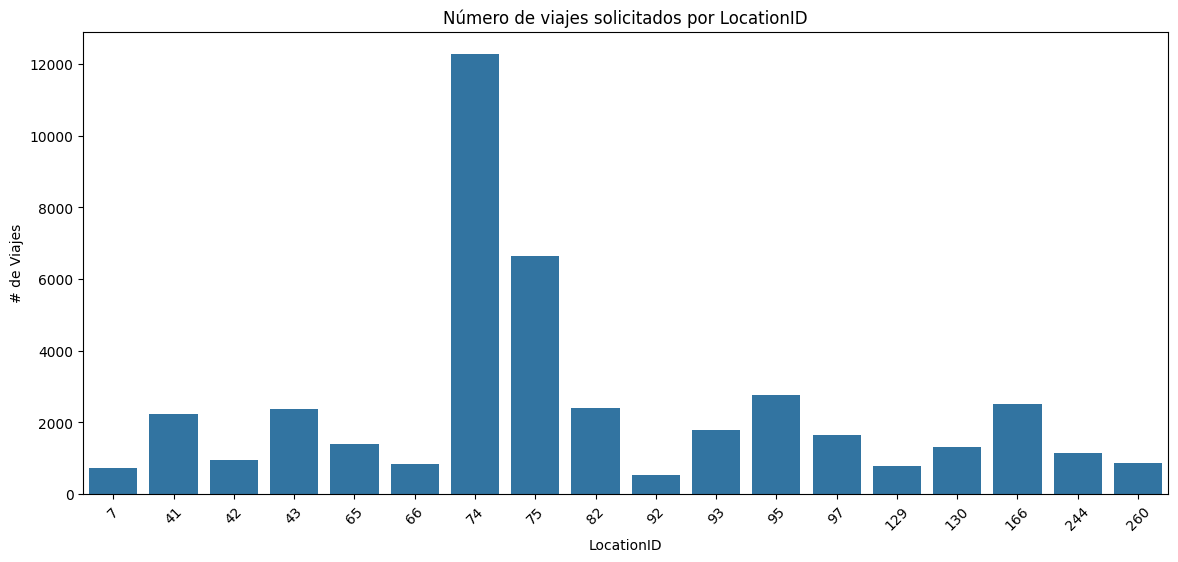

In [44]:
sns.countplot(data=conteo_500,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

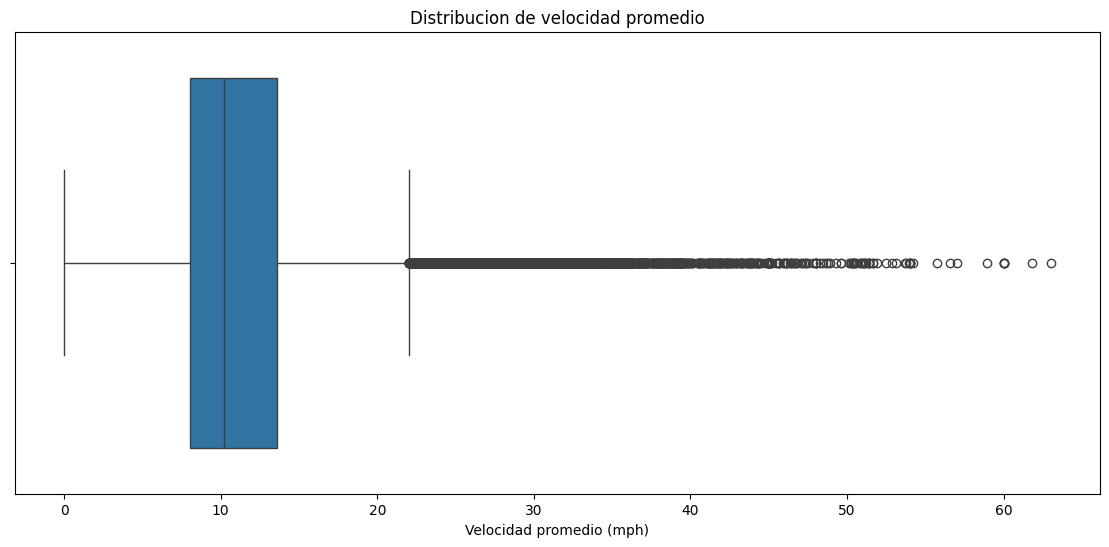

In [45]:
sns.boxplot(x=green_filtrado['avg_speed'])
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.show()

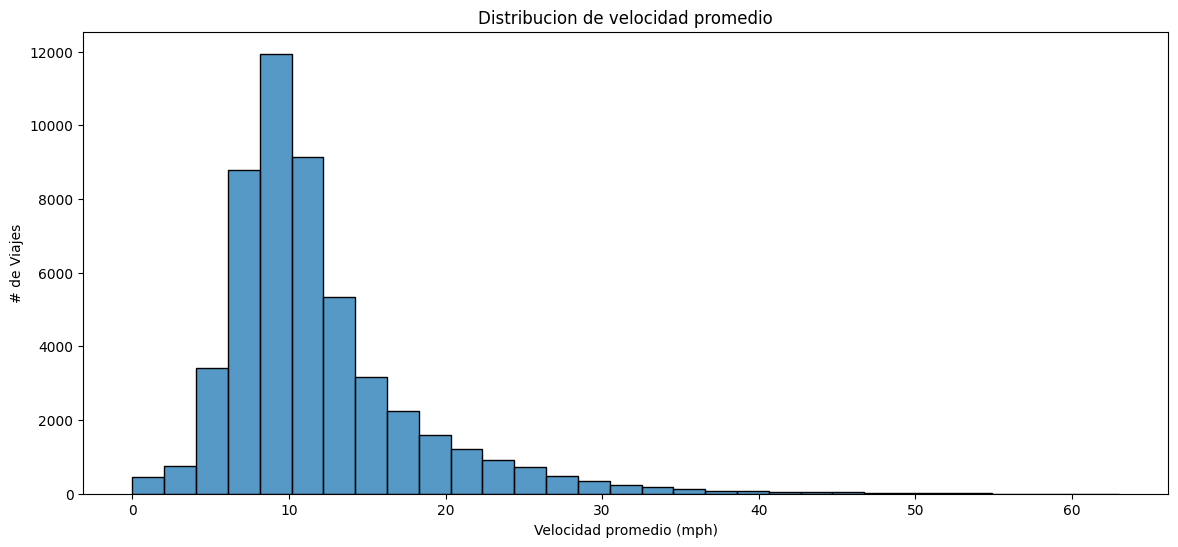

In [46]:
sns.histplot(data=green_filtrado['avg_speed'], binwidth=2)
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.ylabel('# de Viajes')
plt.show()

In [47]:
green_filtrado['avg_speed'].describe()

count    51406.000000
mean        11.751220
std          6.097782
min          0.002996
25%          8.025478
50%         10.227012
75%         13.621338
max         63.000000
Name: avg_speed, dtype: float64

### Se observa una distribucion donde el 50% de los viajes oscilan a una velocidad promedio entre 8.0 y 13.6 mph.

In [48]:
discarded_rows = raw_green_tripdata.shape[0]-green_filtrado.shape[0]

discarded_rows

3000

### Acá se contabilizan las filas que se consideran de calidad y aquellas que han sido descartadas bajo el criterio de velocidad promedio y tarifas 0 o negativas.

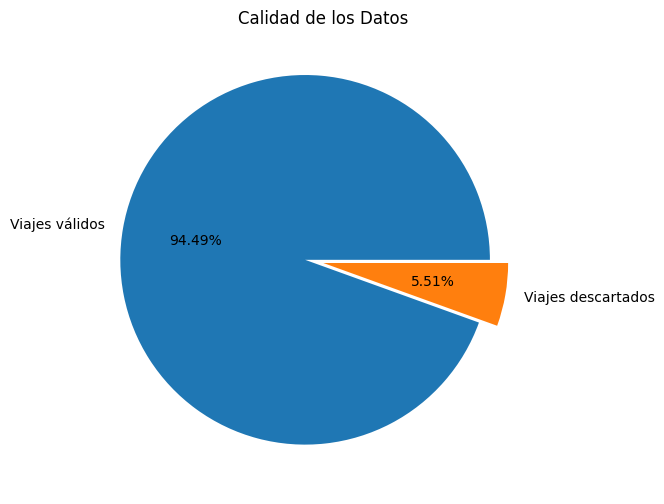

In [49]:
data = [green_filtrado.shape[0], discarded_rows]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('Calidad de los Datos') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

## Se tiene que un poco mas del 94% de la data es data de calidad.

Ahora queremos observar las correlaciones entre las variables, para ello agruparemos segun la ubicación.

In [50]:
green_time_transformed.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:06:40,2024-09-01 00:31:15,10.66,92,37,0 days 00:24:35,26.017627,Sunday,1,9,0,6,2024
1,2024-09-01 00:51:31,2024-09-01 01:14:11,3.89,80,80,0 days 00:22:40,10.297059,Sunday,1,9,0,6,2024
2,2024-09-01 00:02:21,2024-09-01 00:06:37,0.80,42,116,0 days 00:04:16,11.250000,Sunday,1,9,0,6,2024
3,2024-09-01 00:33:27,2024-09-01 00:42:08,1.84,41,42,0 days 00:08:41,12.714012,Sunday,1,9,0,6,2024
4,2024-09-01 00:24:09,2024-09-01 00:29:35,2.19,223,83,0 days 00:05:26,24.184049,Sunday,1,9,0,6,2024


In [51]:
location_counts= green_time_transformed.groupby(['PU_dia','PU_hora','PU_dia_semana','weekday','PULocationID'])\
                                .agg(Count=('PULocationID','count'))\
                                .reset_index()

location_counts

,PU_dia,PU_hora,PU_dia_semana,weekday,PULocationID,Count
0,1,0,6,Sunday,7,1
1,1,0,6,Sunday,25,1
2,1,0,6,Sunday,41,2
3,1,0,6,Sunday,42,3
4,1,0,6,Sunday,66,2
...,...,...,...,...,...,...
14274,30,23,0,Monday,195,1
14275,30,23,0,Monday,210,1
14276,30,23,0,Monday,212,1
14277,30,23,0,Monday,260,1


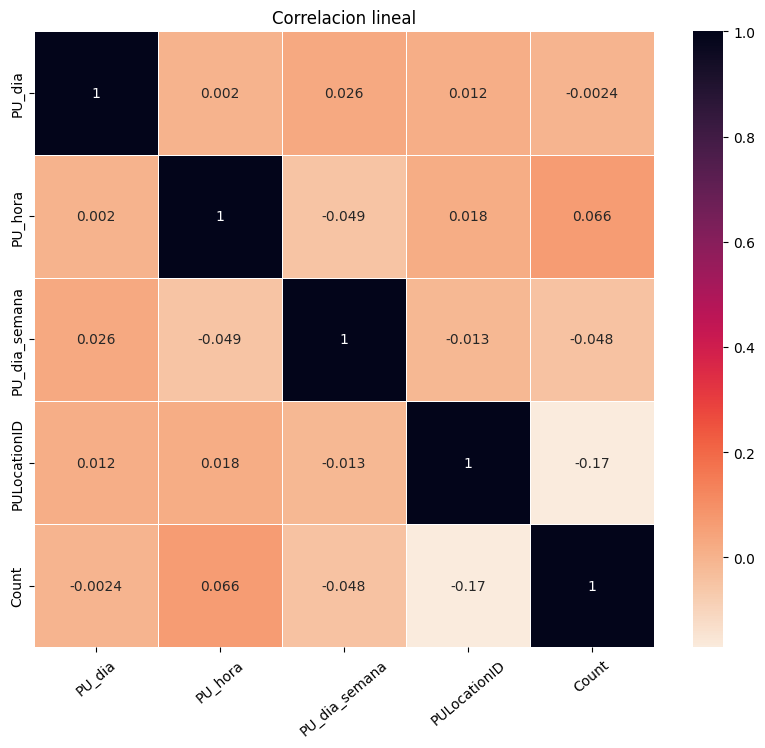

In [52]:
time_location_corr = location_counts[[ 'PU_dia', 'PU_hora', 'PU_dia_semana','PULocationID', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_location_corr, annot=True, linewidth=.5,cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

### Se observa que los atributos que mayor correlacion presentan son la hora y la ubicacion.

### Ahora solo tomaremos en cuenta el conteo total de viajes, independiente de las ubicaciones.

In [53]:
time_counts= green_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

time_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,9,1,0,6,Sunday,56
1,2024,9,1,1,6,Sunday,33
2,2024,9,1,2,6,Sunday,14
3,2024,9,1,3,6,Sunday,20
4,2024,9,1,4,6,Sunday,21
...,...,...,...,...,...,...,...
715,2024,9,30,19,0,Monday,106
716,2024,9,30,20,0,Monday,64
717,2024,9,30,21,0,Monday,70
718,2024,9,30,22,0,Monday,56


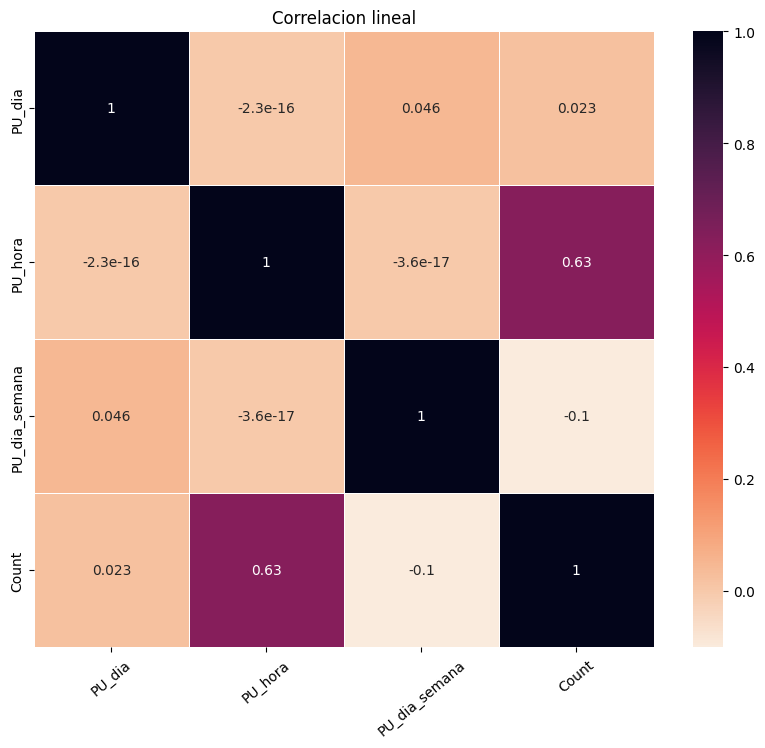

In [54]:
time_corr = time_counts[['PU_dia', 'PU_hora', 'PU_dia_semana', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_corr, annot=True, linewidth=.5, cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

## Se corrobora la influencia que tiene la hora del dia en la demanda de taxis